In [1]:
import numpy as np
import math
from enum import Enum
from collections import namedtuple

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# 家電

## 7. 冷蔵庫（ver自立P4）

### 7.1　定義

#### 7.1.1　機器の電源接続状態および動作状態

冷蔵庫の電源接続状態および動作状態は、以下を想定する。

* 電源接続状態：
    * 常時時、AC電源に接続される。  
* 動作状態：
    * 稼働状態のみが発生する。

#### 7.1.2　機器の機能等

冷蔵庫が有する機能は、以下を想定する。

* 主機能：
    * 冷蔵：稼働時に作動する。
    * 除霜：稼働時に作動する。

| 電源接続状態 | 動作状態 | 機能 |  添え字 |  
|:-----------: |:-------: |:---: |:------: |    
|  AC電源接続  |稼働      | 冷蔵 |ac,opg,rf|  
|  AC電源接続  |稼働      | 除霜 |ac,opg,df|      

### 7.2　消費電力量

日付$d$の時刻$t$における冷蔵庫のAC電源接続時の消費電力量$E_{E,Refrigerator,ac,d,t}$は、式(1)により表される。

<p style="text-indent:2em">AC電源接続時：</p>  
$$ 
\begin{equation*}
    E_{E,Refrigerator,ac,d,t} = E_{E,ac,opg,d,t}
\end{equation*}
$$

<div style="text-align: right;"> (1) </div>

ここで、  

$E_{E,Refrigerator,ac,d,t}$：日付$d$の時刻$t$におけるAC電源接続時の単位時間当たりの消費電力量[Wh]  
$E_{E,ac,opg,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]  

である。

In [2]:
def EE_ac (EE_ac_opg):
    '''AC電源接続時の消費電力量[Wh]を計算する'''
    # EE_ac_opg：AC電源接続下での稼働時の消費電力量[Wh]
    
    return EE_ac_opg

日付$d$の時刻$t$におけるAC電源接続下での稼働時の消費電力量は、式(2)により計算される。

<p style="text-indent:2em">AC電源接続下での稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,ac,opg,d,t} = E_{E,ac,opg,rf,d,t} + E_{E,ac,opg,df,d,t}
\end{equation*}
$$

<div style="text-align: right;"> (2) </div>

ここで、  

$E_{E,ac,opg,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,ac,opg,df,d,t}$：日付$d$の時刻$t$において除霜が機能することによるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,ac,opg,rf,d,t}$：日付$d$の時刻$t$において冷蔵が機能することによるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]   

である。

In [3]:
def EE_ac_opg (EE_ac_opg_rf, EE_ac_opg_df):
    '''AC電源接続時での稼働時の消費電力量[Wh]を計算する'''
    # EE_ac_opg_rf：冷蔵が機能することによる稼働時の消費電力量[Wh]
    # EE_ac_opg_df：除霜が機能することによる稼働時の消費電力量[Wh]
    
    return EE_ac_opg_rf + EE_ac_opg_df

日付$d$の時刻$t$において冷蔵および除霜が機能することによる単位時間当たりの消費電力量は、式(3)および式(4)により計算される。

<p style="text-indent:2em">冷蔵が機能することによる稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,ac,opg,rf,d,t} = P_{opg,rf,d} \times dt_{ac,opg,rf,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (3) </div>

<p style="text-indent:2em">除霜が機能することによる稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,ac,opg,df,d,t} = P_{opg,df} \times dt_{ac,opg,df,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (4) </div>

ただし、式(5)を満たす。  

$$ 
\begin{equation*}
    dt_{ac,opg,rf,d,t} +dt_{ac,opg,df,d,t} = dt_{calc}
\end{equation*}
$$
<div style="text-align: right;"> (5) </div>

ここで、  

$dt_{ac,opg,df,d,t}$：日付$d$の時刻$t$において除霜が機能することによるAC電源接続下での稼働時間の合計[s]  
$dt_{ac,opg,rf,d,t}$：日付$d$の時刻$t$において冷蔵が機能することによるAC電源接続下での稼働時間の合計[s]  
$dt_{calc}$：単位時間[s]   
$E_{E,ac,opg,df,d,t}$：日付$d$の時刻$t$において除霜が機能することによるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,ac,opg,rf,d,t}$：日付$d$の時刻$t$において冷蔵が機能することによるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]  
$P_{opg,df}$：除霜が機能することによる稼働時の平均消費電力[W]  
$P_{opg,rf,d}$：日付$d$において冷蔵が機能することによる稼働時の平均消費電力[W]  

である。

In [4]:
def EE_ac_opg_rf (dt_ac_opg_rf, P_opg_rf):
    '''冷蔵が機能することによるAC電源接続下での稼働時の消費電力量[Wh]を計算する'''
    # dt_ac_opg_rf：冷蔵が機能することによる稼働時間の合計[s]
    # P_opg_rf：冷蔵が機能することによる稼働時の平均消費電力[W]    
  
    return P_opg_rf * dt_ac_opg_rf / 3600

In [5]:
def EE_ac_opg_df (dt_ac_opg_df, P_opg_df):
    '''冷蔵が機能することによるAC電源接続下での稼働時の消費電力量[Wh]を計算する'''
    # dt_ac_opg_df：除霜が機能することによる稼働時間の合計[s]
    # P_opg_df：除霜が機能することによる稼働時の平均消費電力[W]    
  
    return P_opg_df * dt_ac_opg_df / 3600

In [6]:
def check_duration (dt):
    '''合計が単位時間を超過しないか否かを確認する'''
    # dt：稼働時間の合計[s](list型)
    # dt_calc：単位時間[s]
    
    dt_calc = 3600.
    
    # 継続時間を積算する
    dt_sum = sum(dt)
    
    # エラーチェック
    if dt_calc < dt_sum:
        # 単位時間を超える場合 => エラー
        try:
            raise Exception('機器使用スケジュールに不正があります。')
        except Exception:
            raise
    else:
        pass

### 7.3　稼働時の消費電力

冷蔵が機能することによる稼働時の平均消費電力$P_{opg,rf,d}$は、式(6)により計算される。

<p style="text-indent:2em">冷蔵が機能することによる稼働時の平均消費電力：</p>  
$$ 
\begin{equation*}
    P_{opg,rf,d} = \frac{E_{E,ac,opg,rf,d}}{dt_{ac,opg,rf,d} \div 3600}
\end{equation*}
$$

<div style="text-align: right;"> (6) </div>

ここで、  

$dt_{ac,opg,rf,d}$：日付$d$において冷蔵が機能することによるAC電源接続下での稼働時間の合計[s/日]  
$E_{E,ac,opg,rf,d}$：日付$d$において冷蔵が機能することによるAC電源接続下での稼働時の1日当たりの消費電力量[Wh/日]  
$P_{opg,rf,d}$：日付$d$において冷蔵が機能することによる稼働時の平均消費電力[W]  

である。

In [7]:
def P_opg_rf(m_year, APF_JIS, theta_amb_ave, P_opd_df):
    '''冷蔵が機能することによる稼働時の平均消費電力[W]を計算する。'''
    # m_year：冷蔵の製造年[-]
    # APF_JIS：JIS C 9801に基づく冷蔵庫の年間消費電力量[kWh/年]  
    # theta_amb_ave：冷蔵庫の周囲空気温度の日平均値[℃]  
    # P_opd_df：除霜が機能することによる稼働時の平均消費電力[W]  

    # 冷蔵、除霜が機能することによる稼働時間の合計[s/日}
    dt_opg_rf_d, dt_opg_df_d = dt_opg_d()
    
    # 冷蔵庫の年間消費電力量[kWh/年]  
    EE_frige_dd = EE_frige_d(m_year, APF_JIS, theta_amb_ave)
    
    # 冷蔵、除霜が機能することによる稼働時の1日当たりの消費電力量[Wh/日]を計算する
    EE_ac_opg_rf_d, EE_ac_opg_df_d = EE_ac_opg_d(EE_frige_dd, P_opd_df, dt_opg_df_d)
    
    
    return EE_ac_opg_rf_d / (dt_opg_rf_d / 3600)

日付$d$において冷蔵が機能することによるAC電源接続下での稼働時間の合計$dt_{ac,opg,rf,d}$は、式(7)により計算される。

$$
\begin{equation*}
    dt_{ac,opg,rf,d} = 24 \times 3600 - dt_{ac,opg,df,d}
\end{equation*}
$$

<div style="text-align: right;"> (7) </div>

ここで、  

$dt_{ac,opg,df,d}$：日付$d$において除霜が機能することによるAC電源接続下での稼働時間の合計[s/日]  
$dt_{ac,opg,rf,d}$：日付$d$において冷蔵が機能することによるAC電源接続下での稼働時間の合計[s/日]  

である。

1日当たりの除霜運転時間を2時間として、日付$d$において除霜が機能することによるAC電源接続下での稼働時間の合計$dt_{ac,opg,df,d}$は、7200 s/dayとする。

In [8]:
def dt_opg_d():
    '''冷蔵および除霜が機能することによる稼働時間の合計[s/日]を取得する。'''
    
    dt_opg_df_d = 2 * 3600
    dt_opg_rf_d = 24 * 3600 - dt_opg_df_d
    
    return dt_opg_rf_d, dt_opg_df_d 

日付$d$において冷蔵が機能することによるAC電源接続下での稼働時の1日当たりの消費電力量$E_{E,ac,opg,rf,d}$は、式(8)により計算される。

$$ 
\begin{equation*}
    E_{E,ac,opg,rf,d} = E_{E,daily,d} - E_{E,ac,opg,df,d}
\end{equation*}
$$

<div style="text-align: right;"> (8) </div>

ここで、  

$E_{E,ac,opg,df,d}$：日付$d$において除霜が機能することによるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh/日]  
$E_{E,ac,opg,rf,d}$：日付$d$において冷蔵が機能することによるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh/日]  
$E_{E,daily,d}$：日付$d$における冷蔵庫の1日当たりの消費電力量[Wh/日]  

である。

日付$d$において除霜が機能することによるAC電源接続下での稼働時の単位時間当たりの消費電力量$E_{E,ac,opg,df,d}$は、式(9)により計算される。 

$$ 
\begin{equation*}
    E_{E,ac,opg,df,d} = P_{opg,df} \times dt_{ac,opg,df,d} \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (9) </div>

ここで、  

$dt_{ac,opg,df,d}$：日付$d$において除霜が機能することによるAC電源接続下での稼働時間の合計[s]  
$E_{E,ac,opg,df,d}$：日付$d$において除霜が機能することによるAC電源接続下での稼働時の1日当たりの消費電力量[Wh/日]  
$P_{opg,df}$：除霜が機能することによる稼働時の平均消費電力[W]  

である。

In [9]:
def EE_ac_opg_d(EE_frige_d, P_opd_df, dt_opg_df_d):
    '''稼働時の1日当たりの消費電力量[Wh/日]を計算する。'''
    # EE_frige_d：冷蔵庫の1日当たりの消費電力量[Wh/日]
    # P_opd_df：除霜が機能することによる稼働時の平均消費電力[W]  
    # dt_opg_df_d：除霜が機能することによる稼働時間の合計[s/日}
    
    EE_ac_opg_df_d  = P_opd_df * dt_opg_df_d / 3600
    EE_ac_opg_rf_d = EE_frige_d - EE_ac_opg_df_d 
    
    return EE_ac_opg_rf_d, EE_ac_opg_df_d 

日付$d$における冷蔵庫の1日当たりの消費電力量$E_{E,daily,d}$は、式(10)により計算される。

$$ 
\begin{equation*}
    E_{E,daily,d} = \left\{ \left( 3.283 \times 10^{-3} -2.0 \times 10^{-6} \times E_{E,annual} \right) \times \left( \theta_{amb,ave,d}^{2}  -30 \times \theta_{amb,ave,d} \right) +1.85 \times 10^{-3} \times E_{E,annual} +1.329 \right\} \times 1000
\end{equation*}
$$

<div style="text-align: right;"> (10) </div>

ここで、  

$E_{E,annual}$：冷蔵庫の年間消費電力量[kWh/年]  
$E_{E,daily,d}$：日付$d$における冷蔵庫の1日当たりの消費電力量[Wh/日]  
$\theta_{amb,ave,d}$：冷蔵庫の周囲空気温度の日平均値[℃]  

である。

冷蔵庫の年間消費電力量$E_{E,annual}$は、製造年に応じて式(11)により定まる。

<p style="text-indent:2em">製造年が2005年以前（JIS C 9801:1999による）：</p>  
$$ 
\begin{equation*}
    E_{E,annual} = APF_{JIS}
\end{equation*}
$$

<div style="text-align: right;"> (11-1) </div>

<p style="text-indent:2em">製造年が2006年～2015年（JIS C 9801:2006による）：</p>  
$$ 
\begin{equation*}
    E_{E,annual} = \frac{APF_{JIS}}{3.48}
\end{equation*}
$$

<div style="text-align: right;"> (11-2) </div>

<p style="text-indent:2em">製造年が2016年以降（JIS C 9801:2015による）：</p>  
$$ 
\begin{equation*}
    E_{E,annual} = \frac{APF_{JIS}}{3.48} \times 0.2891
\end{equation*}
$$

<div style="text-align: right;"> (11-3) </div>

ここで、  

$APF_{JIS}$：JIS C 9801に基づく冷蔵庫の年間消費電力量[kWh/年]  
$E_{E,annual}$：冷蔵庫の年間消費電力量[kWh/年]  

である。

In [10]:
def EE_frige_d(m_year, APF_JIS, theta_amb_ave):
    # m_year：冷蔵の製造年[-]
    # APF_JIS：JIS C 9801に基づく冷蔵庫の年間消費電力量[kWh/年]  
    # theta_amb_ave：冷蔵庫の周囲空気温度の日平均値[℃]  
    
    def get_EE_annual():
        '''年間消費電力量[kWh/年]を取得する'''
        
        if m_year <= 2005:
            return APF_JIS
        elif 2006 <= m_year and m_year <= 2015:
            return APF_JIS / 3.48
        else:
            return APF_JIS / 3.48 * 0.2891
    
    EE_annual = get_EE_annual()
    
    return ((3.283*(10**(-3)) -2.0*(10**(-6))*EE_annual) * (theta_amb_ave**2 -30*theta_amb_ave) + 1.85*10**(-3)*EE_annual +1.329)*1000

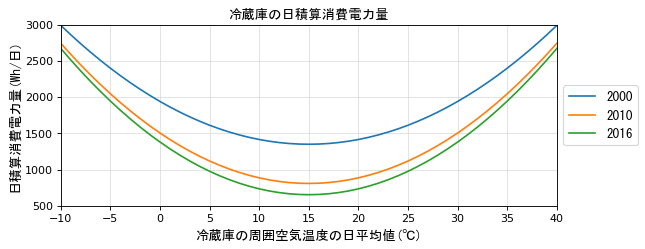

In [11]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('冷蔵庫の日積算消費電力量', fontdict={'fontproperties':fp})

for i,m_year in enumerate([2000, 2010, 2016]):
    x_values =[x for x in range(-10, 45, 1)]
    y_values = [ EE_frige_d(m_year, 330, theta_amb_ave) for theta_amb_ave in range(-10, 45, 1)]
    plt.plot(x_values, y_values, label=m_year)
        
ax=plt.gca()
ax.set_xlabel('冷蔵庫の周囲空気温度の日平均値(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(-10, 50, 5)], minor=False)
ax.set_xbound(lower=-10, upper=40)

ax.set_ylabel('日積算消費電力量(Wh/日)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(500, 3100, 500)], minor=False)
ax.set_ybound(lower=500, upper=3000)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

除霜が機能することによる稼働時の平均消費電力$P_{opg,df}$は、式(12)により計算される

<p style="text-indent:2em">除霜が機能することによる稼働時の平均消費電力：</p>  
$$ 
\begin{equation*}
    P_{opg,df} = P_{rtd,heater} \times 0.9
\end{equation*}
$$

<div style="text-align: right;"> (12) </div>

ここで、  

$P_{opg,df}$：除霜が機能することによる稼働時の平均消費電力[W]  
$P_{rtd,heater}$：電熱器の定格消費電力[W]  

である。

In [12]:
def P_opg_df(P_rtd_heater):
    '''除霜が機能することによる稼働時の平均消費電力[W]を計算する。'''
    # P_rtd_heater：電熱器の定格消費電力[W]  
    
    return P_rtd_heater * 0.9